# Question 1

**Question: What is the distribution of SalePrice? Using Seaborn and Bootstrap.**

**Hypothesis: The distribution of SalePrice is normal distribution.**

In [1]:
#import some necessary librairies
import datascience as ds
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
#ignore annoying warning (from sklearn and seaborn)
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Data Processing

**1. read data**

In [2]:
#read training data into pandas dataframe
train = pd.read_csv('./data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# read test data into pandas dataframe
# we don't know the saleprice of the houses in test data
test = pd.read_csv('./data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


**2. delete unnecessary ID column**

In [5]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# SalePrice distribution


 mu = 180921.20 and sigma = 79415.29

p value =  2.283848353787728e-133


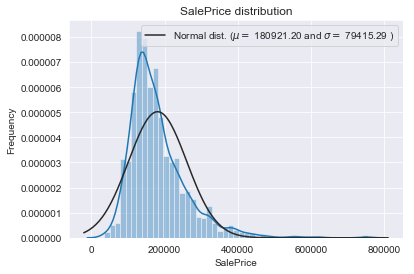

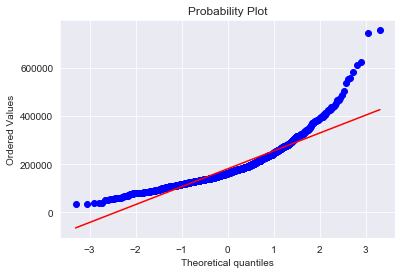

In [6]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

p = stats.normaltest(train["SalePrice"])
print('p value = ', p.pvalue)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



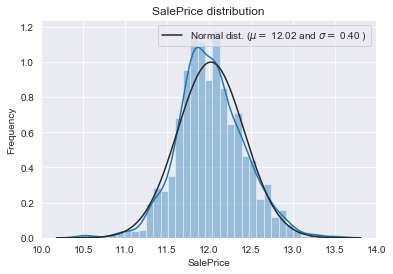

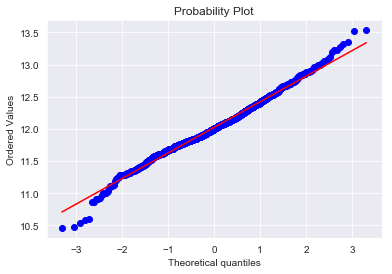

p value =  2.8919171511318714e-06


In [7]:
#We use the numpy fuction log1p which applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#Compute the p value
p = stats.normaltest(train["SalePrice"])
print('p value = ', p.pvalue)

In [8]:
t = train["SalePrice"]

In [9]:
def bootstrap_mean(sample, numBootstrap):
    
    means = ds.make_array()
    for i in range(numBootstrap):
        bootstrap_sample = t.sample(1460,replace = True)
        resampled_mean = bootstrap_sample.mean()
        means = np.append(means, resampled_mean)
        
    return means

means = bootstrap_mean(t, 5000)
left1 = ds.percentile(2.5, means)
right1 = ds.percentile(97.5, means)

In [10]:
left1

12.00338223589536

In [11]:
right1

12.043555197079366

In [12]:
def bootstrap_std(sample, numBootstrap):
    
    stds = ds.make_array()
    for i in range(numBootstrap):
        bootstrap_sample = t.sample(1460,replace = True)
        resampled_std = bootstrap_sample.std()
        stds = np.append(stds, resampled_std)
        
    return stds

stds = bootstrap_std(t, 5000)
left2 = ds.percentile(2.5, stds)
right2 = ds.percentile(97.5, stds)

In [13]:
left2

0.38213340671322554

In [14]:
right2

0.4163938184221638


 mu = 12.02 and sigma = 0.40



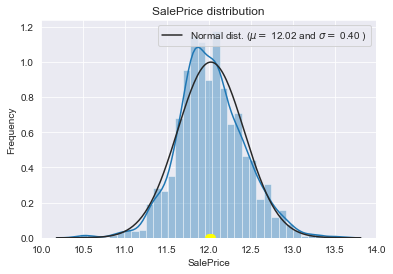

In [15]:
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.plot(ds.make_array(left1, right1), ds.make_array(0, 0), color='yellow', lw=8);

**Conclusion:**

We draw a distribution plot that displays frequency and values of SalePrice. It is not a normal distribution. But after log transformation, we find the data fits normal distribution well. The Q-Q normal plot lies on a straight diagonal line and p-value = 3.21e-06, which is very small. Thus, assume the saleprice of house is variable p, the disribution of log(1+p) is normal distribution with the mean 12.02 and standard deviation 0.40.

We also compare the mean and standard deviation computed by norm.fit and boostrap. The 95% CI of mean is (12.00263671096565, 12.044455791342859) and of SD is (0.38229631587963386, 0.41634487110759016)